#TP : Video Games Sales

Ce dataset contient une liste de jeux videos avec des ventes supérieur à plus de 100 000 copies.


In [ ]:
#Importation des librairies
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#Accès au DataSet du Drive
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Digital campus/Algorithme'
df = pd.read_csv(root_path+"/DataSources/vgsales.csv", sep=",")
print("dataset loaded")

#Test 
df.head()

Mounted at /content/gdrive
dataset loaded


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#Visualisation des colonnes et de leurs type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Information sur le Dataset

Ce Dataset comporte plus de 16598 entrée, avec un total de 11 colonnes qui sont les suivantes :
   - **Rank** - Rang du jeu basé sur la totalité des ventes
   - **Name** - Le nom du jeu
   - **Platform** - Plateforme du jeu sortie (i.e. PC,PS4, etc.)
   - **Year** - Année de la sortie du jeu
   - **Genre** - Le genre du jeu
   - **Publisher** - Éditeur du jeu
   - **NA_Sales** - Vente NA (millions)
   - **EU_Sales** - Vente Europe (millions)
   - **JP_Sales** - Vente Japon (millions)
   - **Other_Sales** - Vente dans le reste du monde (millions)
   - **Global_Sales** - Total des ventes dans le monde.


#Vérification des valeurs "null"

Nous pouvons voir qu'il manque des données pour l'année (271) et les publishers (58) pour certains jeux.

In [78]:
#Vérification des valeurs vide
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [77]:
#Check des lignes
df1 = df[df.isna().any(axis=1)]
df1.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [ ]:
# Suppression des lignes contenant des valeurs vides.
# ! ! Attention DROP des values avec NaN !!
df.dropna(how='any')

# Visualisation des ventes des jeux video au cours des années.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


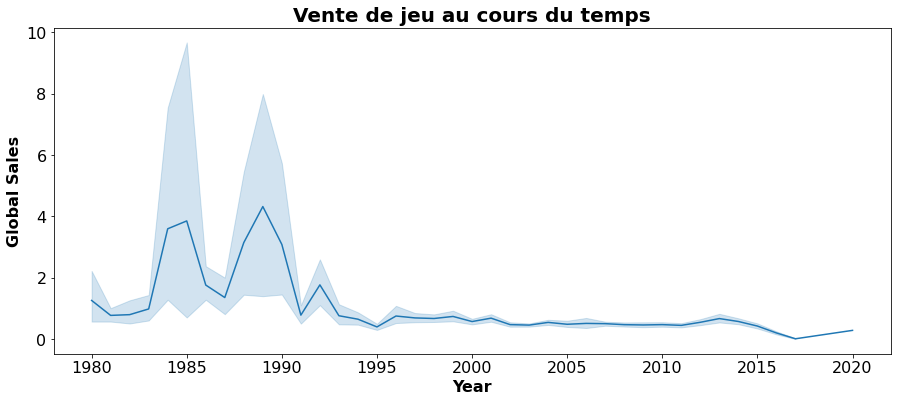

In [ ]:
# utilisation de Line plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(df['Year'], df['Global_Sales'])

ax.set_title('Vente de jeu au cours du temps', fontsize = 20, loc='center',fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Global Sales', fontsize = 16, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

# Vente des jeux de sport au cours des années

Permet de voir la globalité des ventes des jeux de sport au cours des années.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


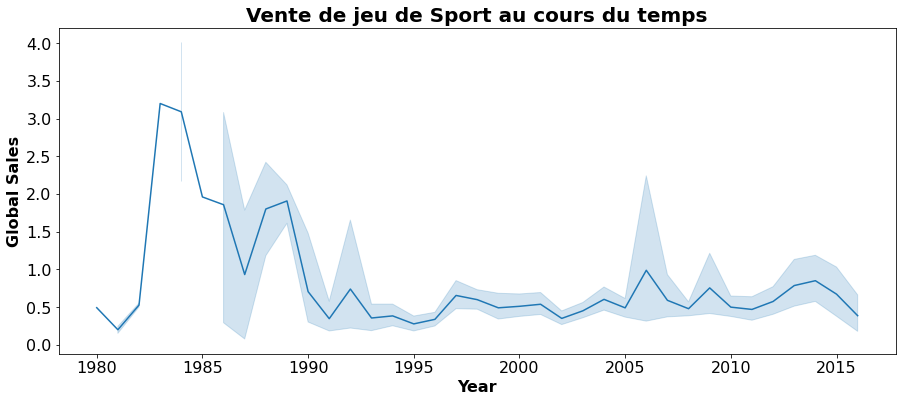

In [ ]:
df_Sport = df[ df['Genre'] == "Sports" ]

fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(df_Sport['Year'], df_Sport['Global_Sales'])

ax.set_title('Vente de jeu de Sport au cours du temps', fontsize = 20, loc='center',fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Global Sales', fontsize = 16, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

# Comparer les ventes de jeu par rapport aux plateformes.

Comparaison des ventes globales entre la plateformes PS4 et Xbox One

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Vente')

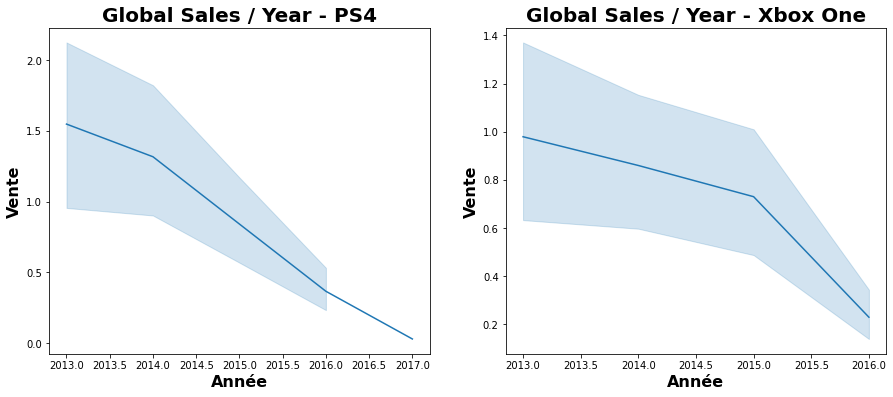

In [58]:
#Création de table sur les plateformes Xbox One - PS4
df_ps4 = df[ df['Platform'] == "PS4" ]
df_xboxOne = df[ df['Platform'] == "XOne" ]

#Comparaison entre les ventes sur PS4 et Xbox One
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.lineplot(df_ps4['Year'], df_ps4['Global_Sales'], ax=ax[0])
ax[0].set_title('Global Sales / Year - PS4', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Vente', fontsize = 16, fontdict=dict(weight='bold'))

sns.lineplot(df_xboxOne['Year'], df_xboxOne['Global_Sales'], ax=ax[1])
ax[1].set_title('Global Sales / Year - Xbox One', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Vente', fontsize = 16, fontdict=dict(weight='bold'))

# Comparaison des genres de jeu entre deux années

([<matplotlib.patches.Wedge at 0x7fbd965f6710>,
 [Text(0.5118796443510655, 0.9736422493395749, 'Sports'),
  Text(-0.9061592584019061, 0.6235987479241021, 'Shooter'),
  Text(-1.093401080557109, -0.12030825838880119, 'Action'),
  Text(-0.7918938635244653, -0.7634815707744985, 'Role-Playing'),
  Text(-0.21952353433033145, -1.0778726352752073, 'Platform'),
  Text(0.29761746055142957, -1.058973015319521, 'Fighting'),
  Text(0.6400447683989814, -0.8946187425071612, 'Misc'),
  Text(0.8706461074467637, -0.6722911241328408, 'Racing'),
  Text(0.9959930428798062, -0.46690240793448995, 'Adventure'),
  Text(1.0642320572596558, -0.2782267569822875, 'Strategy'),
  Text(1.096286474491638, -0.09031038615073649, 'Simulation')],
 [Text(0.2792070787369448, 0.531077590548859, '34.59'),
  Text(-0.4942686864010396, 0.3401447715949647, '11.63'),
  Text(-0.5964005893947867, -0.06562268639389156, '11.05'),
  Text(-0.431942107376981, -0.4164444931497264, '9.88'),
  Text(-0.11974010963472623, -0.5879305283319312,

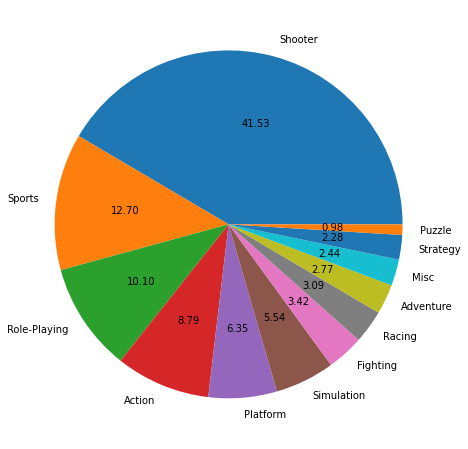

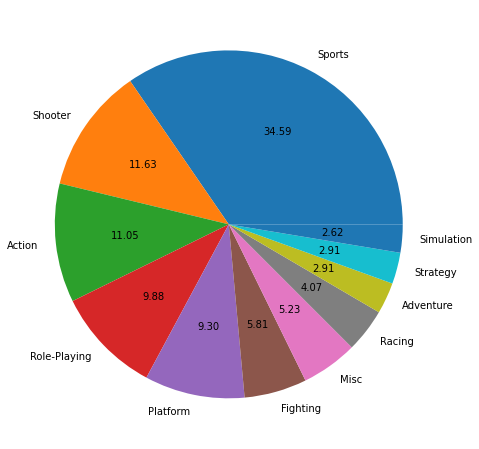

In [ ]:
#Création de table de jeux parut en 2015
df_2015 = df[ df['Year'] == 2015 ]
df_2016 = df[ df['Year'] == 2016 ]
#Création des valeurs pour les labels
GameGenre2015 = df_2015.Genre.unique()
GameGenre2016 = df_2016.Genre.unique()

plt.figure(figsize =(12,8))
plt.pie(df_2015.Genre.value_counts(),labels = GameGenre2015, autopct = "%.2f")

plt.figure(figsize =(12,8))
plt.pie(df_2016.Genre.value_counts(),labels = GameGenre2016, autopct = "%.2f")

# Comparaison des ventes d'un jeu sur ces différentes plateformes

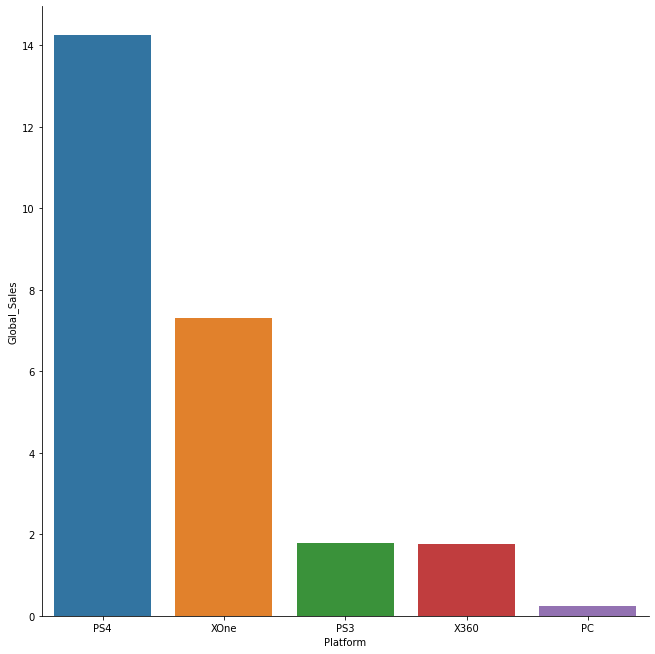

In [22]:
#Création d'un tableau consacré à un jeu
df_licence = df[ df['Name'] == "Call of Duty: Black Ops 3" ]
sns.catplot(x="Platform", y="Global_Sales", data= df_licence, kind="bar", height=9)

# Visualisation des ventes d'un éditeurs dans les différents Continents/Pays

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

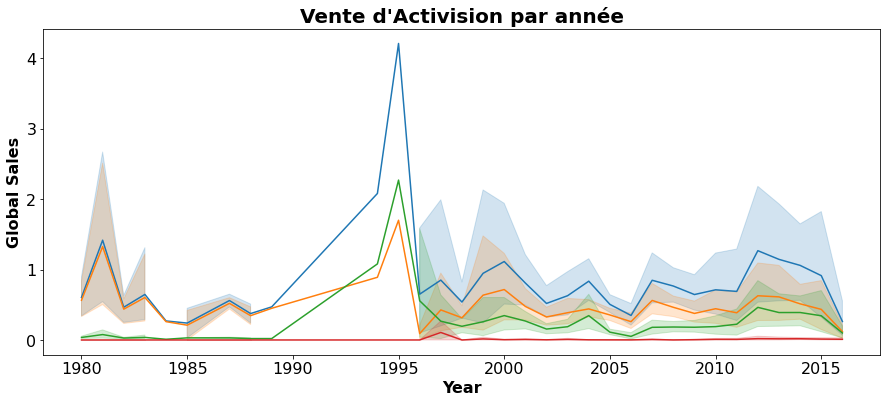

In [55]:
df_Publisher = df[ df['Publisher'] == "Activision" ]


# utilisation de Line plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(df_Publisher['Year'], df_Publisher['Global_Sales'])
sns.lineplot(df_Publisher['Year'], df_Publisher['NA_Sales'])
sns.lineplot(df_Publisher['Year'], df_Publisher['EU_Sales'])
sns.lineplot(df_Publisher['Year'], df_Publisher['JP_Sales'])

ax.set_title("Vente d'Activision par année", fontsize = 20, loc='center',fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Global Sales', fontsize = 16, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
